<a href="https://colab.research.google.com/github/flee2-trinity/Deep-Learning-in-Sports-Result-Prediction-/blob/main/PBP1819GIDPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
DATA_PATH = '/content/gdrive/My Drive/2021 Fall/Thesis I'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import csv
filename = '/content/gdrive/My Drive/2021 Fall/Thesis I/Records/PBP1819GID.txt'
with open(filename, newline='') as f:
  reader = csv.reader(f)
  p1content = list(reader)

In [ ]:
from collections import defaultdict
groups = defaultdict(list)
"""
for o in allData:
    groups[o.GameID].append(o)

gList = list(groups.values())
"""

'\nfor o in allData:\n    groups[o.GameID].append(o)\n\ngList = list(groups.values())\n'

In [ ]:
print(len(p1content))
print(p1content[200:300])
for t in range(len(p1content)):
  s = p1content[t][0].split()
  if len(s) >= 4 :
    #print(t)
    #(str(label)+" "+ str(period) + " " + str(tm)+ " " + str(abs(diff))+  " " + str(gID)+ " " + str(dayC) + "\n")
    if int(s[1])> 0:
      groups[int(s[4])].append((float(s[0]), int(s[1]), int(s[2]), float(s[3]), int(s[5])))
gList = list(groups.values())

119643
[['1 3 527 8 984155 120'], ['1 3 526 8 984155 120'], ['1 3 512 8 984155 120'], ['1 3 512 8 984155 120'], ['1 3 512 8 984155 120'], ['1 3 512 7 984155 120'], ['1 3 500 9 984155 120'], ['1 3 483 9 984155 120'], ['1 3 482 9 984155 120'], ['1 3 470 9 984155 120'], ['1 3 464 9 984155 120'], ['1 3 462 9 984155 120'], ['1 3 457 9 984155 120'], ['1 3 455 9 984155 120'], ['1 3 447 11 984155 120'], ['1 3 447 11 984155 120'], ['1 3 447 11 984155 120'], ['1 3 447 11 984155 120'], ['1 3 435 11 984155 120'], ['1 3 432 11 984155 120'], ['1 3 432 11 984155 120'], ['1 3 419 11 984155 120'], ['1 3 417 11 984155 120'], ['1 3 407 14 984155 120'], ['1 3 400 14 984155 120'], ['1 3 400 14 984155 120'], ['1 3 400 14 984155 120'], ['1 3 380 14 984155 120'], ['1 3 378 14 984155 120'], ['1 3 375 14 984155 120'], ['1 3 373 14 984155 120'], ['1 3 369 14 984155 120'], ['1 3 366 14 984155 120'], ['1 3 361 14 984155 120'], ['1 3 361 13 984155 120'], ['1 3 361 12 984155 120'], ['1 3 347 12 984155 120'], ['1 3 3

In [ ]:
xList = [i for i in range(1, 97)]
print(len(gList))
newL1 = []
newL2 = []
for gl in gList:
  y1List = [[]for i in range(97)]
  y2List = [[]for i in range(97)]
  for g in gl:

    t = int((int(g[1])-1)*24 + (720-int(g[2]))/30)
    y1List[t].append(g[0])
    y2List[t].append(g[3])
    
  newL1.append(y1List)
  newL2.append(y2List)

244


In [ ]:
from statistics import mean
meany1 = []
meany2 = []
for yL in newL1:
  tempL = list(map(lambda x: mean(x) if len(x) > 0 else -1, yL[:96]))
  meany1.append(tempL)
for yL in newL2:
  tempL = list(map(lambda x: mean(x) if len(x) > 0 else -1, yL[:96]))
  meany2.append(tempL)
y1ListM = []
y2ListM = []
e = 0
for i in range(96):
  q = 0.0
  total = 0.0
  for x in meany1:
    if x[i] >= 0:
      q += 1
      total += x[i]
    else:
      e += 1
  y1ListM.append(total/q)
for i in range(96):
  q = 0.0
  total = 0.0
  for x in meany2:
    if x[i] >= 0:
      q += 1
      total += x[i]
  y2ListM.append(total/q)
    
print(e)
print(y1ListM)

25
[0.6202625906329611, 0.6210382513661203, 0.6149248633879782, 0.623360655737705, 0.6198770491803278, 0.6256733021077282, 0.6165300546448086, 0.6164728372720177, 0.6180230288836844, 0.6170765027322406, 0.6201356362217018, 0.617286299765808, 0.621570644718793, 0.6237314597970335, 0.6318309764006484, 0.632168878480354, 0.6261612021857923, 0.6214919984387198, 0.6273195952499232, 0.6350214676034349, 0.6257318501170961, 0.6252990975327041, 0.6313638433515483, 0.6331275720164609, 0.6369535519125683, 0.6417837626854019, 0.6383245511319281, 0.6405460109163813, 0.6419398907103825, 0.6356947697111631, 0.6450429352068696, 0.6395926477893691, 0.6360753317720531, 0.6299326697892271, 0.6425721797635378, 0.6438776671870934, 0.6472415903768363, 0.6439508521988031, 0.6496096799375487, 0.6458918813427009, 0.6499254843517139, 0.6468335619570187, 0.6372495446265938, 0.6453551912568306, 0.640564738292011, 0.6343579234972677, 0.6468969555035128, 0.6517930327868853, 0.6525377229080933, 0.6548497267759563, 0

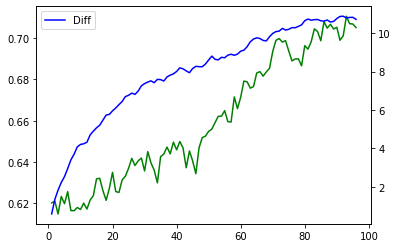

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(xList, y1ListM, label = "Accuracy", color='green')
ax_right.plot(xList, y2ListM, label = "Diff", color='blue')
plt.legend()
plt.show()